<a href="https://colab.research.google.com/github/Trantracy/Handwritten-digits-database.ipynb/blob/master/MNIST_Handwritten_digits_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 Lab: MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


For easy to understand how this data set was built, I get an example image, which contains number 7, from mist.
1. Resize it from 28x28 to 10X10 and make diagram. Each pixel in image contains value from 0 to 255. The greater the number, the whiter the color. That is the way how people encode the image. [Link](https://www.scan2cad.com/tips/bitmap-vs-vector/) for further information.
2. Because each observation should be one line in dataset so we reshape 2-D array to 1-D array. Using 1-D array as feature vector and label it. In our case, it's 7.
3. Do it again with the other images from mist. We will have a table with feature vector and label. Take a close look at first and third observation. The pattern of them are much similar than second observation. Base on this thing, we hope that can build a model that classify a number using feature vector.

Let's do it.
![Imgur](https://i.imgur.com/wtFCKS3.jpg)

## TODO
1. Read dataset
    - Dataset is too large (42000 observation) for some computer. To make it easy to handle, we get 5000 sample from origin dataset
    - Split data set into train and test set
2. Visualization
    - Visualization helps you understand more about data set. Grab an observation and visualize it.
3. Modeling
    - We try with 2 tree base model:
        - Decision Tree
        - Random Forest
4. Evaluate model
    - Calculate accuracy, precision, recall, f1 score with each model.
    - Random Forest vs Decision Tree, which one is better.
5. Fine Tune
    - Random Forest has many hyper parameters that we have to choose, so which combination is bet fit with our data set? Using gridsearchCV to find it.

## 1. Read dataset

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import dataset
# Your code here
data = pd.read_csv("/content/drive/My Drive/FTMLE - Tonga/Week_6/MNIST_Lab_Section/data/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [0]:
# For easy to handle, we use a small pice of dataset
# Ramdomly choose 5000 rows for now
# hint: dataframe.sample(5000)
# Your code here
df = data.sample(5000)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 25645 to 7663
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 30.0 MB


In [0]:
# Let's take a look at first 5 rows ()
# Your code here
df[:5]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12952,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41491,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39944,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34348,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 37856 to 16358
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 30.0 MB


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```
![image](https://i.imgur.com/lFxwGOf.png=500x500)

In [0]:
# Let's list all unique values are there in 'label'
# We expect to see a list from 0 to 9
# Your code here
df['label'].value_counts()

1    574
7    528
3    508
2    506
9    503
6    493
4    493
0    492
8    461
5    442
Name: label, dtype: int64

In [0]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
# Your code here
from sklearn.model_selection import train_test_split
X = np.array(df[df.columns[1:]])
y = np.array(df['label'])



In [0]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
# Your code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101 )

In [0]:
X_train.shape

(3750, 784)

In [0]:
y_train

array([7, 6, 4, ..., 8, 4, 3])

In [0]:
X_train

## 2. Visualization

Label: 8


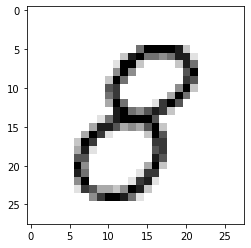

Label: 1


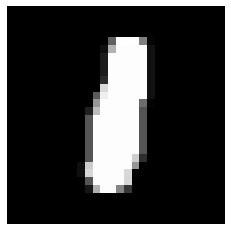

In [0]:
# Now let's convert some example of our data back to image
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Let's print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
# Now we try to look at the number with index is 36, you can try with different index for exp: 30, 49

index1 = np.random.randint(0,3750)

print("Label: " + str(y_train[index1]))
plt.imshow(X_train.reshape(-1, 28, 28)[index1], cmap='binary')
plt.show()


index = 36
print("Label: " + str(y_train[index]))

plt.imshow(X_train[index].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()



## 3. Modeling

In [0]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
# Your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()



In [0]:
# Let's fit training data to Random Forest Classifier
# Your code here
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Let's fit training data to Decision Tree Classifier
# Your code here
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 4. Evaluate model

In [0]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
# Your code here
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rfc_test = rfc.predict(X_test)
print(classification_report(y_test,rfc_test))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       112
           1       0.97      0.99      0.98       147
           2       0.90      0.93      0.92       135
           3       0.92      0.91      0.91       140
           4       0.93      0.96      0.94       134
           5       0.96      0.92      0.94       106
           6       0.97      0.95      0.96       119
           7       0.93      0.92      0.93       116
           8       0.94      0.90      0.92       124
           9       0.91      0.91      0.91       117

    accuracy                           0.94      1250
   macro avg       0.94      0.94      0.94      1250
weighted avg       0.94      0.94      0.94      1250



In [0]:
# Decision Tree model
# Your code here
dtc_test = dtc.predict(X_test)
print(classification_report(y_test,dtc_test))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       112
           1       0.87      0.92      0.89       147
           2       0.70      0.67      0.69       135
           3       0.71      0.66      0.68       140
           4       0.79      0.78      0.78       134
           5       0.65      0.69      0.67       106
           6       0.81      0.76      0.78       119
           7       0.77      0.85      0.81       116
           8       0.67      0.63      0.65       124
           9       0.68      0.71      0.69       117

    accuracy                           0.75      1250
   macro avg       0.75      0.75      0.75      1250
weighted avg       0.75      0.75      0.75      1250



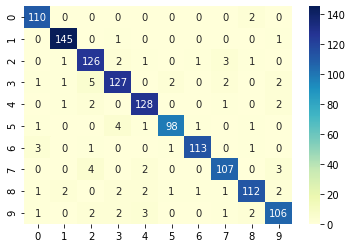

In [0]:
# Remember seaborn with its amazing heatmap()? 
# Actually we can use heatmap() to visualize the confustion matrix
# Just for example about the style of heatmap: cmap="YlGnBu", annot=True, fmt="d"

# Let's plot the heatmap for confusion matrix of Random Forest model
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

matrix_rfc = confusion_matrix(y_test,rfc_test)
sns.heatmap(matrix_rfc, cmap="YlGnBu", annot=True, fmt="d") # annot=True : Annotate each cell with the numeric value, using integer formatting fmt="d"
plt.show()



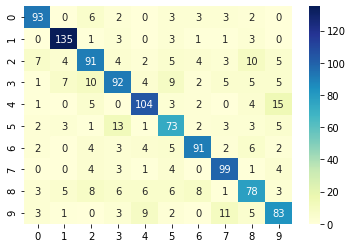

In [0]:
# And heatmap for confusion matrix of Decision Tree model
# Your code here
matrix_dtc = confusion_matrix(y_test, dtc_test)
sns.heatmap(matrix_dtc,cmap="YlGnBu", annot=True, fmt="d")
plt.show()

## 5. Fine Tune
[Further reading](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

### 5.1 By Random SearchSearch

In [0]:
# Base on the accuracy score we decide to take Random Forest as our Classifier and we're going to improve it
# Now let's take a look at the parameter 'n_estimators' which is the number of trees in the forest
# Do you think the more tree we have the better our model will be?



from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Max - Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Max - number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf.fit(X_train, y_train)
# prediction with new model
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.1min finished


0.9464


In [0]:
accuracy_score(y_test,rfc_test)

0.9376

In [0]:
# Check the best hyperparameter
clf.best_params_

{'bootstrap': False,
 'max_depth': 98,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [0]:
# Improvement:
print('Improvement of {:0.2f}%.'.format( 100 * (accuracy_score(y_test, predictions) - accuracy_score(y_test,rfc_test)) / accuracy_score(y_test,rfc_test)))

Improvement of 0.94%.


In [0]:
# create model with best hyperparameter:
final_model = RandomForestClassifier(n_estimators = 100, max_depth =  98,min_samples_split  = 2,min_samples_leaf = 1,max_features = 'sqrt',bootstrap = False)

In [0]:
# Train with all dataset:
X_data = np.array(data[data.columns[1:]])
y_data = np.array(data['label'])

In [0]:
final_model.fit(X_data,y_data)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=98, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Great job!

In [0]:
# save model
import joblib
joblib.dump(final_model, "Tran.pkl")
Tran = joblib.load("Tran.pkl")
